# Final Project


## Creating Bathymetry Maps



### Import Library

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
from shapely import geometry

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, cartopy, cmocean, seaborn, shapely

Software versions
Python 3.9.7 64bit [GCC 9.4.0]
IPython 8.1.1
OS Linux 4.15.0 142 generic x86_64 with glibc2.23
numpy 1.20.3
matplotlib 3.4.3
cartopy 0.18.0
cmocean 2.0
seaborn 0.11.2
shapely 1.7.1
Sun Apr 30 12:40:51 2023 WIB

### Download bathymetry data

https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-bathymetry/

In [3]:
shp_dict = {} 
files = glob('ne_10m_bathymetry_all/*.shp') 
assert len(files) > 0 
files.sort() 
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    nei = cart.io.shapereader.Reader(f)  
    shp_dict[depth] = nei  

In [4]:
depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)
print(depths)

['0', '200', '1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000', '10000']


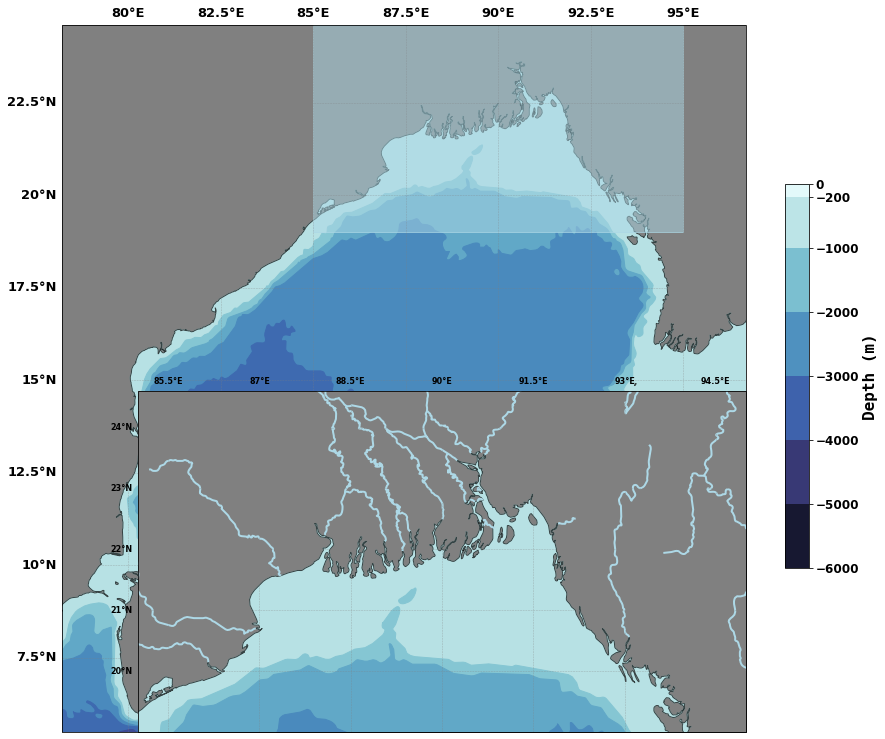

In [5]:
fig = plt.figure(figsize=(13,13))
###Define coordinate location
#Indonesia map
llonmin = 78.2
llonmax = 96.7
llatmin = 5.5
llatmax = 24.6

#Malacca Strait 
lonmin = 85
lonmax = 95
latmin = 19
latmax = 24.6

ax = plt.axes(projection=ccrs.PlateCarree(), label='1')
ax.set_extent((llonmin, llonmax, llatmin, llatmax), crs=ccrs.PlateCarree())

###Define feature
#Add depth bathymetry
def depth_map(ax,x):
    i = 0
    for depth in depths[:x]:
        ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
        i+=1
#Add land
def land_map(ax):
    ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='10m'),color='grey',
                  zorder=0)
#Add coastline
def coastline_map(ax):
    ax.coastlines(lw=1,resolution='10m',color='black', alpha=0.7)
#Add river
def river_map(ax): 
    ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='rivers_lake_centerlines',
                                                    scale='10m'), linewidth=2, facecolor='none', edgecolor='lightblue')
#Add grid line
def grid_line(ax,lbvalue,rbvalue,bobvalue,tobvalue,size):
    gl = ax.gridlines(draw_labels=True,linewidth=0.5, alpha = 0.5, color='gray',linestyle='--')
    gl.right_labels = rbvalue
    gl.left_labels = lbvalue
    gl.bottom_labels = bobvalue 
    gl.top_labels = tobvalue
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': size, 'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': size, 'color': 'black', 'weight': 'bold'}
    
# Add text
# def text_locator_all(ax):
#     ax.text(114, 0, 'Kalimantan', fontsize=12, fontweight='bold',
#              horizontalalignment='center', rotation = 0, color='black')
#     ax.text(108, 5, 'South China Sea', fontsize=10, fontweight='bold',
#              horizontalalignment='center', rotation = 0, color='black')
#     ax.text(110, -7.5, 'Java', fontsize=11, fontweight='bold',
#              horizontalalignment='center', rotation = 0, color='black')
#     ax.text(96, -12, 'Indian Ocean', fontsize=12, fontweight='bold',
#              horizontalalignment='center', rotation = -40, color='black')
#     ax.text(120.5, -3, 'Sulawesi', fontsize=8, fontweight='bold',
#              horizontalalignment='center', rotation = -47, color='black')
#     ax.text(139, -4, 'Papua', fontsize=12, fontweight='bold',
#              horizontalalignment='center', rotation = 0, color='black')
#     ax.text(118, -3.54, 'Makassar Strait', fontsize=8, fontweight='bold',
#              horizontalalignment='center', rotation = 70, color='black')
#     ax.text(102.859, -3, 'Sumatra', fontsize=12, fontweight='bold',
#              horizontalalignment='center', rotation = -45, color='black')
# def text_locator(iax):
#     iax.text(116.5, 0.6, 'East Kalimantan', fontsize=8, fontweight='bold',horizontalalignment='center')
#     iax.text(117, -0.3, 'Mahakam River', fontsize=8, fontweight='bold',horizontalalignment='center')
#     iax.text(118.5, -1.3, 'M a k a s s a r  S t r a i t', fontsize=10, fontweight='bold',horizontalalignment='center', rotation = 80, color='white')

#Marking position
def add_sub_region_box(ax):
    """ """
    geom = geometry.box(minx=lonmin,maxx=lonmax,miny=latmin,maxy=latmax)
    ax.add_geometries([geom], crs=ccrs.PlateCarree(), alpha=0.5, color='lightblue')
    
###Configure feature for Large Map
depth_map(ax,8)
land_map(ax)
coastline_map(ax)
grid_line(ax,True,False,False,True,13)
# text_locator_all(ax)
add_sub_region_box(ax)

###Add custom colorbar
#axi = fig.add_axes([0.92,0.35,0.025,0.5])
axi = fig.add_axes([0.92,0.3,0.025,0.41])

norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

#formatting labels and ticklabels
cbar.ax.tick_params(labelsize=12)
for tick in cbar.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
text = cbar.ax.yaxis.label
font = matplotlib.font_manager.FontProperties(family='monospace', size=16, weight='bold')#, style='italic')
text.set_font_properties(font)

###Zoom Inset
size = .65
iax = plt.axes([0, 0, size, size], projection=ccrs.PlateCarree(), label='2')
extent=[lonmin, lonmax, latmin, latmax]
iax.set_extent(extent, crs=ccrs.PlateCarree())

#Configure feature for subset map
depth_map(iax,8)
land_map(iax)
coastline_map(iax)
river_map(iax)
# text_locator(iax)
grid_line(iax,True,False,False,True,8)

#define position for subset map
def set_subplot2corner(ax,ax_sub,corner="bottomright"):
    ax.get_figure().canvas.draw()
    p1 = ax.get_position()
    p2 = ax_sub.get_position()
    if corner == "topright":
        ax_sub.set_position([p1.x1-p2.width, p1.y1-p2.height, p2.width, p2.height])
    if corner == "bottomright":
        ax_sub.set_position([p1.x1-p2.width, p1.y0, p2.width, p2.height])
    if corner == "bottomleft":
        ax_sub.set_position([p1.x0, p1.y0, p2.width, p2.height])
    if corner == "topleft":
        ax_sub.set_position([p1.x0, p1.y1-p2.height, p2.width, p2.height])

set_subplot2corner(ax,iax,corner="bottomright")

plt.savefig('Northern BoB.png',bbox_inches = 'tight', dpi = 600)